# Feature extraction from sound

## 1. sample_list

In [1]:
import os
import numpy as np

file_dir = "C:/Users/User/Desktop/sound_data/wav_data/hello/"
file_list = np.array([])
for file in os.listdir(file_dir):
    file_list = np.append(file_list,file)

# sample list  
from scipy.io import wavfile

sample_list = []
sample_rate = 44100
for file in file_list:
    sample_rate,sample_data = wavfile.read(file_dir+file)
    sample_list.append(sample_data)

## 2. mfcc

In [2]:
import librosa
x , sr = librosa.load(file_dir+file_list[0])

In [3]:
import IPython.display as ipd
ipd.Audio(x,rate=sr)

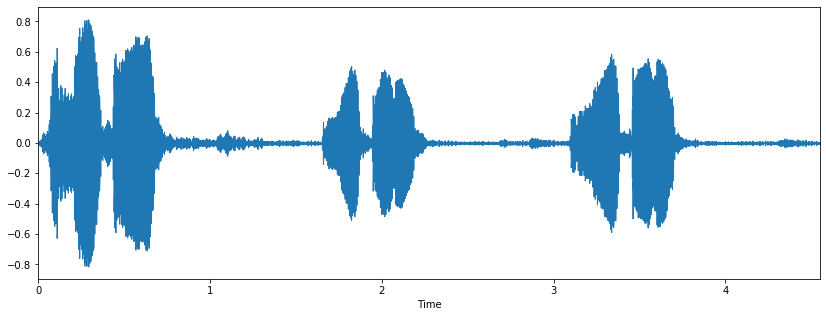

In [57]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [18]:
x*(2**15-1)

array([  0.82914156,   3.8133128 ,   5.9917903 , ..., 240.52002   ,
       221.84183   , 219.83037   ], dtype=float32)

## 1. stft(short-term fourier transform

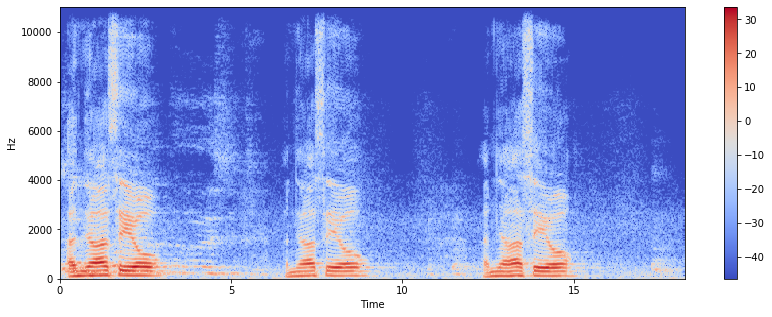

In [58]:
#display Spectrogram
X = librosa.stft(x,n_fft=512)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
# librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [184]:
n_freq=512

(512/((n_freq-1)/2))*2

4.007827788649706

In [155]:
((512-1)/2)

255.5

## 2. zero-crossing

In [55]:
zero_crossings = librosa.zero_crossings(x, pad=False)
print(sum(zero_crossings))

5890


### 3. spectral centroid

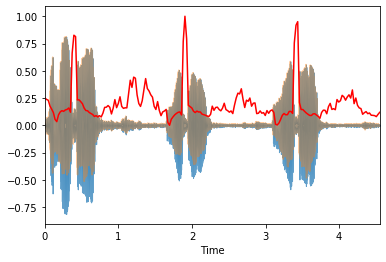

In [66]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
import librosa
import matplotlib.pyplot as plt
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr,n_fft=512)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.7)
plt.plot(np.linspace(0,len(x)/sr,len(x)),x,alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

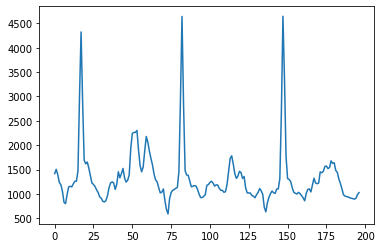

In [29]:
librosa.frames_to_time(frames)
plt.plot(spectral_centroids)

## spectral_rolloff

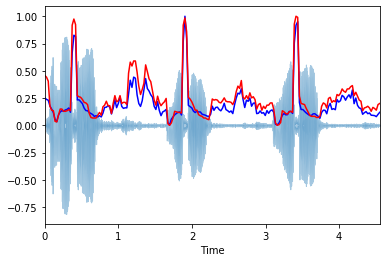

In [60]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr,n_fft=512)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')
plt.plot(t, normalize(spectral_rolloff), color='r')

(20, 197)


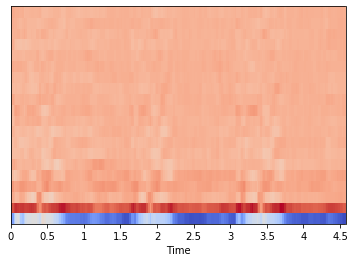

In [67]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

### data 만들기

> * 10분이상 데이터 -> 75%는 학습, 25%는 데이터만들기  
> * 5초 단위로 끊어서 학습, 5초단위로 끊어서 테스트  
> * 10,15,30초 단위로 해보기

* #### header

In [2]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

* #### 파일 쪼개기

In [2]:
from mutagen.mp3 import MP3 
audio = MP3(voice)  
audio_len = audio.info.length
gap = 5

ModuleNotFoundError: No module named 'mutagen'

In [14]:
import audioread
def a():
    file_dir = 'C:/Users/user/desktop/sound_data/youtube/'
    audio = audioread.audio_open(file_dir+'cho/cho.mp3')
#     print(audio.channels, audio.samplerate, audio.duration)

In [23]:
def b():
    for i in range(1000000):
        pass

In [24]:
%timeit b()

43 ms ± 918 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
%timeit a()

389 ms ± 37.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%timeit c()

625 ms ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
def c():
    file_dir = 'C:/Users/user/desktop/sound_data/youtube/'
    librosa.load(file_dir+'cho/cho.mp3',offset=1,duration=2)

In [5]:
import sys
sys.getsizeof(audio)

56

## gap으로 나눠서 각각의 특징을 추출하여 csv로 저장.

In [3]:
# import csv
# import librosa
# import os
# import audioread
# import numpy as np
# from tqdm import tqdm

# #X,y 로 저장할 csv open
# gap = 5
# csv_data = f'C:/Users/user/desktop/sound_data/csv/data_gap{gap}.csv'
# file = open(csv_data, 'w', newline='')
# with file:
#     writer = csv.writer(file)
#     writer.writerow(header)

# # y_label
# people = 'sul joe cho kim'.split()
# file_dir = 'C:/Users/user/desktop/sound_data/youtube/'

# # 사람 폴더별로 파일 읽어서 5초 간격으로 잘라내서 X,y값을 불러와서 csv에 저장
# for person in people:
#     for filename in os.listdir(file_dir+person):
#         voice = file_dir+person+'/'+filename
#         audio = audioread.audio_open(voice)  
#         audio_len = audio.duration
#         for n in tqdm(range(0,int(audio_len)-gap,gap)):
#             y, sr = librosa.load(voice, mono=True, offset=n, duration=(n+gap))
            
#             #특징추출
#             chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
#             rmse = librosa.feature.rmse(y=y)
#             spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
#             spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
#             rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
#             zcr = librosa.feature.zero_crossing_rate(y)
#             mfcc = librosa.feature.mfcc(y=y, sr=sr)
            
#             to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
#             for e in mfcc:
#                 to_append += f' {np.mean(e)}'
#             to_append += f' {person}'
#             file = open(csv_data, 'a', newline='')
#             with file:
#                 writer = csv.writer(file)
#                 writer.writerow(to_append.split())

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 244/244 [2:11:41<00:00, 32.38s/it]


In [3]:
a = "./m4a_files/이봐징징이.wav"

b1 = "C:/Users/user/desktop/sound_data/youtube/cho/cho.wav"
b2 = "C:/Users/user/desktop/sound_data/youtube/cho/cho.mp3"

In [23]:
from pydub import AudioSegment
from pydub.playback import play

song = AudioSegment.from_mp3(b2)
# song.export("final.wav", format="wav")

## 분석

In [8]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
import keras
from keras import models
from keras import layers

In [6]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [ ]:
file_dir_csv = 'C:/Users/user/desktop/sound_data/csv/'
file = open(file_dir_csv+'data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'sul joe cho kim'.split()
file_dir = 'C:/Users/user/desktop/sound_data/youtube/'
for g in genres:
    for filename in os.listdir(file_dir+g):
        songname = file_dir+g+'/'+filename
        x, sr = librosa.load(songname, mono=True, duration=30)
        
        y,z = x[0:len(x)*2//3],x[len(x)*2//3:len(x)]
        
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rmse(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open(file_dir_csv+'data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
            
        chroma_stft = librosa.feature.chroma_stft(y=z, sr=sr)
        rmse = librosa.feature.rmse(y=z)
        spec_cent = librosa.feature.spectral_centroid(y=z, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=z, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=z, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(z)
        mfcc = librosa.feature.mfcc(y=z, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'  
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open(file_dir_csv+'data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())  


In [8]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
import keras
from keras import models
from keras import layers
from sklearn.preprocessing import OneHotEncoder


In [29]:
import sklearn.datasets as sk

In [30]:
data = sk.load_boston()

In [33]:
onehotencoder = OneHotEncoder(categorical_features = [3])
y = onehotencoder.fit_transform(pd.compat(genre_list,y))

TypeError: 'module' object is not callable

In [34]:
pd.compat(genre_list,y)

TypeError: 'module' object is not callable

In [35]:
type(genre_list)

pandas.core.series.Series

In [36]:
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)`

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [41]:
enc.transform([['Female', 1], ['Male', 4]])

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [20]:
genre_list.shape

(747,)

In [21]:
y.shape

(747,)

In [31]:
X.shape

(747, 26)

In [12]:
data = pd.read_csv(csv_data)
data.head()

# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
data.head()

genre_list = data.iloc[:, -1]
# encoder = LabelEncoder()
# y = encoder.fit_transform(genre_list)
onehotencoder = OneHotEncoder(categorical_features = [0],[1],[2],[3])
y = onehotencoder.fit_transform(genre_list).toarray()
print(y)


# normalizing
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

# spliting of dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)


# creating a model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=128)
                    
# calculate accuracy
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

# predictions
predictions = model.predict(X_test)
np.argmax(predictions[0])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


IndexError: tuple index out of range